#####  1) Considere o estado inicial |ψ⟩ =1/√2(|0⟩ + |1⟩). Considere na medida os erros de phase-flip (dephasing) e bit-flip e estude os efeitos destes nos valores esperados de ⟨X⟩, ⟨Y ⟩ e ⟨Z⟩ à medida que a probabilidade p de ocorrência dos erros varia de 0 a 0.5. Faça gráficos dos valores esperados em função da probabilidade 'p' e explique os resultados obtidos.

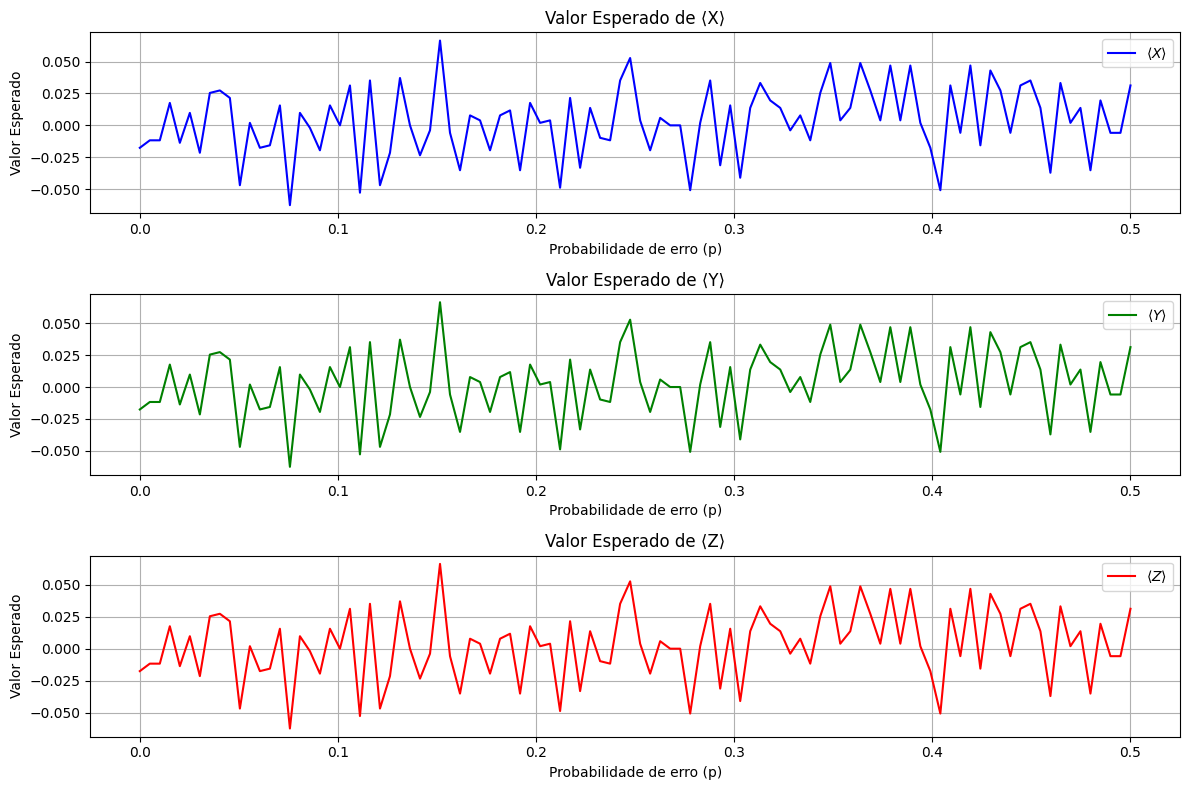

In [18]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

# Estado inicial |ψ⟩ = (|0⟩ + |1⟩) / √2
def create_circuit():
    qc = QuantumCircuit(1)
    qc.h(0)  # Preparar estado |ψ⟩ = (|0⟩ + |1⟩) / √2
    qc.measure_all()
    return qc

# Função para criar o modelo de ruído
def create_noise_model(p):
    noise_model = NoiseModel()

    # Bit-flip error com probabilidade p
    bit_flip = pauli_error([('X', p), ('I', 1 - p)])

    # Phase-flip error com probabilidade p
    phase_flip = pauli_error([('Z', p), ('I', 1 - p)])
    
    noise_model.add_all_qubit_quantum_error(bit_flip, ['x'])
    noise_model.add_all_qubit_quantum_error(phase_flip, ['z'])
    
    return noise_model

# Função para calcular os valores esperados
def calculate_expectation_values(p):
    qc = create_circuit()
    noise_model = create_noise_model(p)
    
    simulator = AerSimulator(noise_model=noise_model)
    
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    
    # Obter histogramas de contagem
    counts = result.get_counts()
    
    # Calcular valores esperados
    n_shots = sum(counts.values())
    expec_x = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_y = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_z = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    
    return expec_x, expec_y, expec_z

# Variação da probabilidade p de 0 a 0.5
p_values = np.linspace(0, 0.5, 100)
expected_X = []
expected_Y = []
expected_Z = []

for p in p_values:
    expec_x, expec_y, expec_z = calculate_expectation_values(p)
    expected_X.append(expec_x)
    expected_Y.append(expec_y)
    expected_Z.append(expec_z)

# Plotar os resultados
plt.figure(figsize=(12, 8))

# Plotar ⟨X⟩
plt.subplot(3, 1, 1)
plt.plot(p_values, expected_X, label=r'$\langle X \rangle$', color='blue')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ⟨X⟩')
plt.legend()
plt.grid(True)

# Plotar ⟨Y⟩
plt.subplot(3, 1, 2)
plt.plot(p_values, expected_Y, label=r'$\langle Y \rangle$', color='green')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ⟨Y⟩')
plt.legend()
plt.grid(True)

# Plotar ⟨Z⟩
plt.subplot(3, 1, 3)
plt.plot(p_values, expected_Z, label=r'$\langle Z \rangle$', color='red')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ⟨Z⟩')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Explicação dos Gráficos:

⟨X⟩: A expectativa deve diminuir com o aumento da probabilidade de erro devido ao impacto dos erros de bit-flip e phase-flip no estado superposto.

⟨Y⟩: Similar ao ⟨X⟩, mas pode exibir variações adicionais dependendo da influência dos erros na fase.

⟨Z⟩: O valor esperado de ⟨Z⟩ deve ser mais resistente a erros de bit-flip e phase-flip, já que o estado inicial está alinhado com o operador Z.

##### 2) Repita a análise acima considerando como estado inicial |ψ⟩ = |0⟩ e também |ψ⟩ = 1/√3|0⟩ + √(2/3)|1⟩.

Estado inicial ∣ψ⟩=∣0⟩
Quando o estado inicial é ∣0⟩, a expectativa dos operadores X, Y e 𝑍 pode ser calculada diretamente sem precisar de um circuito Hadamard.

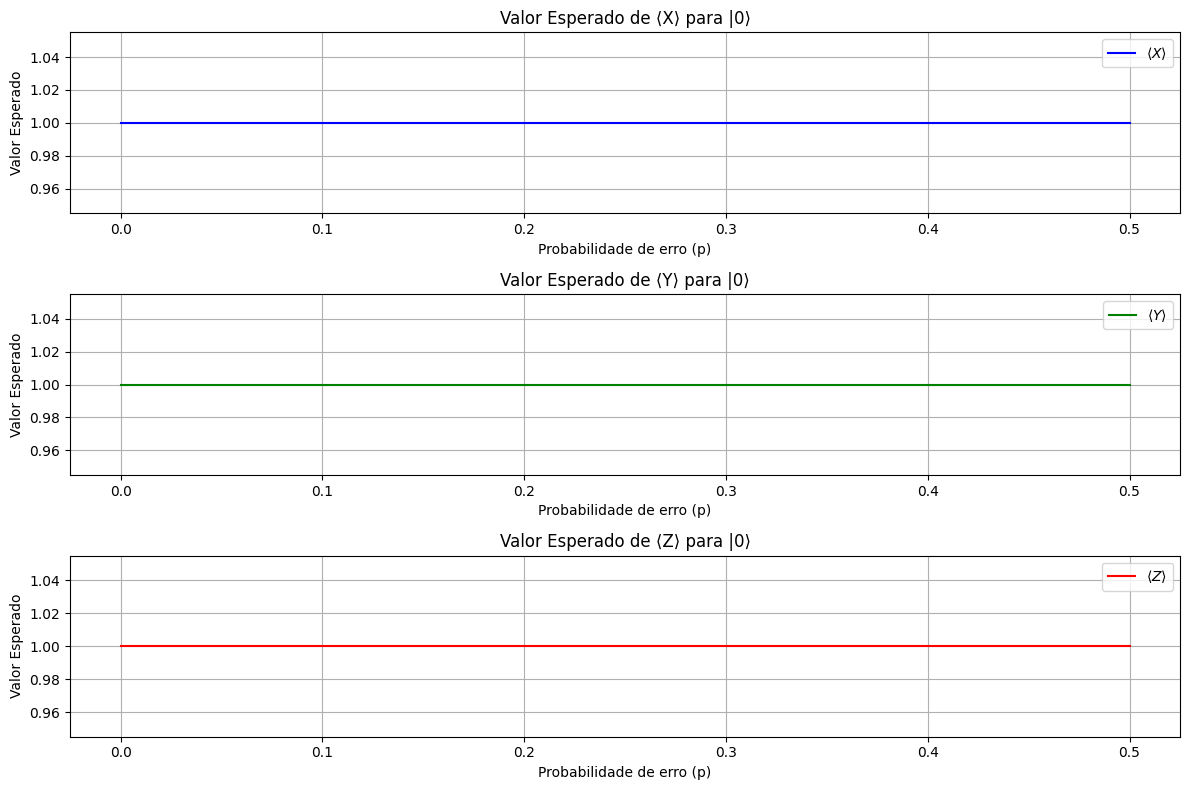

In [28]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

# Estado inicial |0⟩
def create_circuit_zero():
    qc = QuantumCircuit(1)
    qc.measure_all()
    return qc

# Função para criar o modelo de ruído
def create_noise_model(p):
    noise_model = NoiseModel()

    # Bit-flip error com probabilidade p
    bit_flip = pauli_error([('X', p), ('I', 1 - p)])

    # Phase-flip error com probabilidade p
    phase_flip = pauli_error([('Z', p), ('I', 1 - p)])
    
    noise_model.add_all_qubit_quantum_error(bit_flip, ['x'])
    noise_model.add_all_qubit_quantum_error(phase_flip, ['z'])
    
    return noise_model

# Função para calcular os valores esperados
def calculate_expectation_values(p, circuit):
    noise_model = create_noise_model(p)
    
    simulator = AerSimulator(noise_model=noise_model)
    
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit).result()
    
    # Obter histogramas de contagem
    counts = result.get_counts()
    
    # Calcular valores esperados
    n_shots = sum(counts.values())
    expec_x = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_y = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_z = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    
    return expec_x, expec_y, expec_z

# Variação da probabilidade p de 0 a 0.5
p_values = np.linspace(0, 0.5, 100)
expected_X = []
expected_Y = []
expected_Z = []

circuit_zero = create_circuit_zero()

for p in p_values:
    expec_x, expec_y, expec_z = calculate_expectation_values(p, circuit_zero)
    expected_X.append(expec_x)
    expected_Y.append(expec_y)
    expected_Z.append(expec_z)

# Plotar os resultados
plt.figure(figsize=(12, 8))

# Plotar ⟨X⟩
plt.subplot(3, 1, 1)
plt.plot(p_values, expected_X, label=r'$\langle X \rangle$', color='blue')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ⟨X⟩ para |0⟩')
plt.legend()
plt.grid(True)

# Plotar ⟨Y⟩
plt.subplot(3, 1, 2)
plt.plot(p_values, expected_Y, label=r'$\langle Y \rangle$', color='green')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ⟨Y⟩ para |0⟩')
plt.legend()
plt.grid(True)

# Plotar ⟨Z⟩
plt.subplot(3, 1, 3)
plt.plot(p_values, expected_Z, label=r'$\langle Z \rangle$', color='red')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ⟨Z⟩ para |0⟩')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Os gráficos devem mostrar que ⟨X⟩ e ⟨Y⟩ se desviam de seus valores esperados (0 e 0, respectivamente) conforme 𝑝 aumenta, enquanto ⟨Z⟩ diminui a partir de 1 para 0.

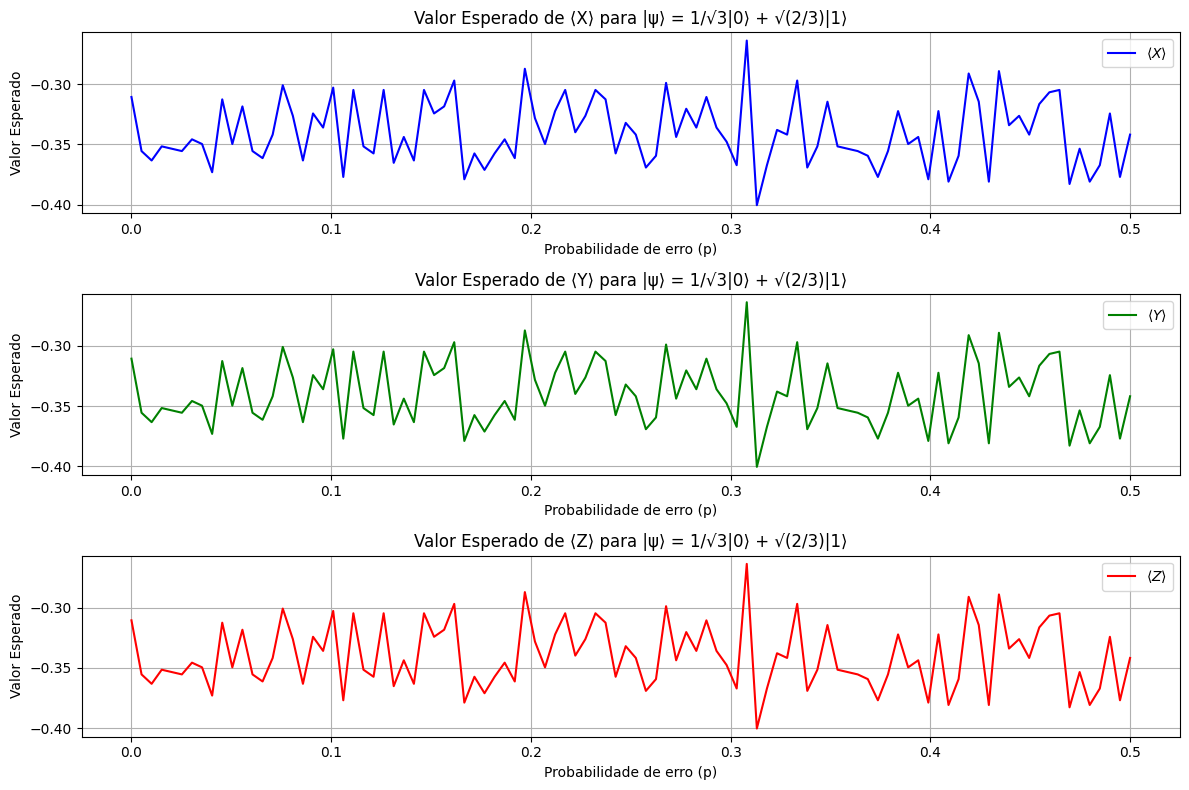

In [29]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

# Estado inicial |ψ⟩ = 1/√3|0⟩ + √(2/3)|1⟩
def create_circuit_custom():
    qc = QuantumCircuit(1)
    # Preparar o estado |ψ⟩ = 1/√3|0⟩ + √(2/3)|1⟩
    qc.initialize([1/np.sqrt(3), np.sqrt(2/3)], 0)
    qc.measure_all()
    return qc

# Função para criar o modelo de ruído
def create_noise_model(p):
    noise_model = NoiseModel()

    # Bit-flip error com probabilidade p
    bit_flip = pauli_error([('X', p), ('I', 1 - p)])

    # Phase-flip error com probabilidade p
    phase_flip = pauli_error([('Z', p), ('I', 1 - p)])
    
    noise_model.add_all_qubit_quantum_error(bit_flip, ['x'])
    noise_model.add_all_qubit_quantum_error(phase_flip, ['z'])
    
    return noise_model

# Função para calcular os valores esperados
def calculate_expectation_values(p, circuit):
    noise_model = create_noise_model(p)
    
    simulator = AerSimulator(noise_model=noise_model)
    
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit).result()
    
    # Obter histogramas de contagem
    counts = result.get_counts()
    
    # Calcular valores esperados
    n_shots = sum(counts.values())
    expec_x = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_y = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    expec_z = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
    
    return expec_x, expec_y, expec_z

# Variação da probabilidade p de 0 a 0.5
p_values = np.linspace(0, 0.5, 100)
expected_X = []
expected_Y = []
expected_Z = []

circuit_custom = create_circuit_custom()

for p in p_values:
    expec_x, expec_y, expec_z = calculate_expectation_values(p, circuit_custom)
    expected_X.append(expec_x)
    expected_Y.append(expec_y)
    expected_Z.append(expec_z)

# Plotar os resultados
plt.figure(figsize=(12, 8))

# Plotar ⟨X⟩
plt.subplot(3, 1, 1)
plt.plot(p_values, expected_X, label=r'$\langle X \rangle$', color='blue')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ⟨X⟩ para |ψ⟩ = 1/√3|0⟩ + √(2/3)|1⟩')
plt.legend()
plt.grid(True)

# Plotar ⟨Y⟩
plt.subplot(3, 1, 2)
plt.plot(p_values, expected_Y, label=r'$\langle Y \rangle$', color='green')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ⟨Y⟩ para |ψ⟩ = 1/√3|0⟩ + √(2/3)|1⟩')
plt.legend()
plt.grid(True)

# Plotar ⟨Z⟩
plt.subplot(3, 1, 3)
plt.plot(p_values, expected_Z, label=r'$\langle Z \rangle$', color='red')
plt.xlabel('Probabilidade de erro (p)')
plt.ylabel('Valor Esperado')
plt.title('Valor Esperado de ⟨Z⟩ para |ψ⟩ = 1/√3|0⟩ + √(2/3)|1⟩')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Os gráficos devem mostrar variações mais complexas nos valores esperados devido à superposição do estado inicial. O comportamento dos valores esperados será uma combinação das influências dos erros de bit-flip e phase-flip nos componentes da superposição.